<a href="https://colab.research.google.com/github/Aayushh/Twitter_Machine_Learning/blob/main/Twitter_Sentiment_Analysis_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

data source: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [ ]:
# Load the data

from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
tweets_df = pd.read_csv('/content/drive/MyDrive/IGIDR_Surabhi_content/Section 4 /NLP/twitter.csv')

In [ ]:
tweets_df = tweets_df.sample(n=3000)
tweets_df.head()

,id,label,tweet
29955,29956,0,went out to some club tonight out here in the ...
24326,24327,0,how if you live alone and you get a fever in t...
12303,12304,0,what a #view #oregon #poland #usa #unitedsta...
5236,5237,0,at laaast! got new ð§.music is the best comp...
23392,23393,0,@user 3 days left to go for your chance to wi...


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 28402 to 16473
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3000 non-null   int64 
 1   label   3000 non-null   int64 
 2   tweet   3000 non-null   object
dtypes: int64(2), object(1)
memory usage: 93.8+ KB


In [ ]:
tweets_df.describe()

,id,label
count,3000.000000,3000.000000
mean,15721.995667,0.078667
std,9302.686224,0.269263
min,8.000000,0.000000
25%,7477.750000,0.000000
50%,15582.500000,0.000000
75%,23779.000000,0.000000
max,31961.000000,1.000000


# TASK #3: EXPLORE DATASET

In [ ]:
tweets_df.isnull().sum()

label    0
tweet    0
dtype: int64

<Axes: >

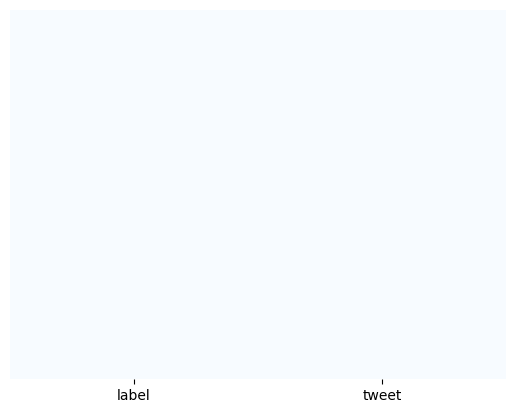

In [ ]:
 #exploring null elements 
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'label'}>]], dtype=object)

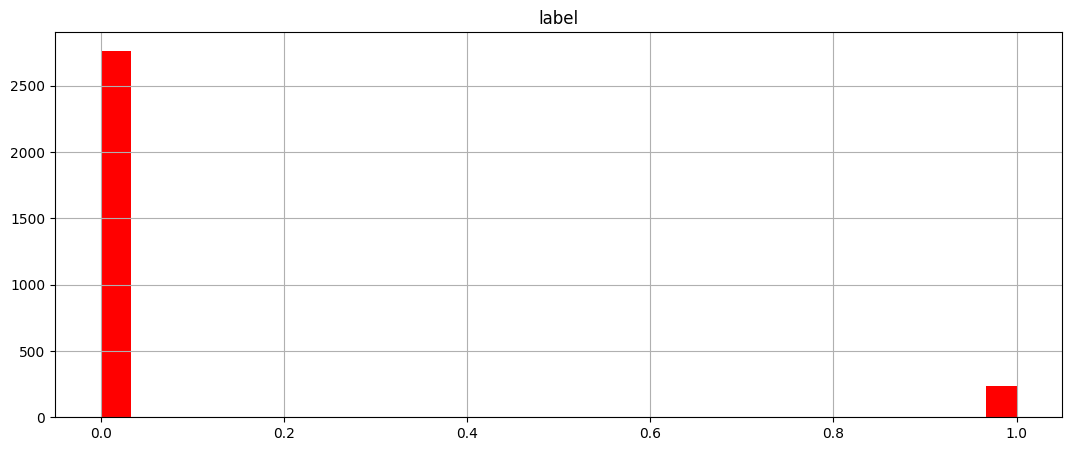

In [ ]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

In [ ]:
# Let's get the length of the messages
tweets_df['length']= tweets_df['tweet'].apply(len)


In [ ]:
tweets_df

,label,tweet,length
29955,0,went out to some club tonight out here in the ...,110
24326,0,how if you live alone and you get a fever in t...,133
12303,0,what a #view #oregon #poland #usa #unitedsta...,85
5236,0,at laaast! got new ð§.music is the best comp...,93
23392,0,@user 3 days left to go for your chance to wi...,102
...,...,...,...
27292,0,itâs pretty fâcked up that in america you ...,117
12561,0,ð #fathersday ð enjoy! ð,36
23997,0,@user johnthanmorris father day from susan verre,49
31366,0,@user âfor every minute you are you lose ...,129


<Axes: ylabel='Frequency'>

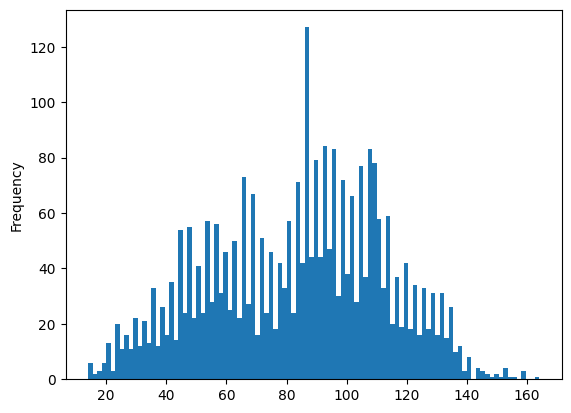

In [ ]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [ ]:
tweets_df.describe()

,label,length
count,3000.000000,3000.000000
mean,0.078667,83.572000
std,0.269263,28.962385
min,0.000000,14.000000
25%,0.000000,61.000000
50%,0.000000,86.000000
75%,0.000000,106.000000
max,1.000000,164.000000


In [ ]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 12]['tweet'].iloc[0]

'my king k   '

In [ ]:
negative = tweets_df[tweets_df['label']==1]

In [ ]:
negative

,label,tweet,length
13476,1,white girl has sex with black guy nude newzee...,57
11115,1,@user indianapolis colts black cheerleader hug...,84
3478,1,@user #obama suppoing #communism+#islam which ...,118
20521,1,@user awesome. black man gets kkk members to d...,92
9073,1,are you #hispanic &amp; feel like the are â¦...,91
...,...,...,...
15404,1,thought factory: bbc neutrality on right wing ...,107
28911,1,@user @user why cant we run this #thug #fool ...,86
14621,1,@user #allahsoil riyadh is renowned for some o...,109
25917,1,@user you might be a libtard if... #libtard #...,69


# TASK #4: PLOT THE WORDCLOUD

In [ ]:
sentences = tweets_df['tweet'].tolist()

In [ ]:
sentences[:20]

['does #magnettherapy really work?   #altwaystoheal #healing #healthy   !! ',
 ' @user sacred #piano #musicproducer #musicproduction #electronic #electricmusic #aist #music  â\x80¦ ',
 'dj_konik-konik_world-(dj036)-web-2016-ukhx . #web   hardcore #1gabba #vk ',
 'who defines ?: historically #oppressed or historic #oppressors/#privileged',
 "i've been waiting this feeling of freedom for last 15 weeksð\x9f\x98\x85 this semester was way more difficult than the previous one.  ",
 'twinklatinboys - na: #slut #snapshot #hot #nasty #naughty #sexy #horny #shy #porn #nude   #kinky #xxx #y... ',
 'ð\x9f\x8cº  friday stay #blessed and  ',
 '- - *top poetry id   poetry #ishq-o-muhbt #new poetry #lajawab #classic poet #urdu_sms - follow @user send 40404',
 'what is a #detoxdiet?  #altwaystoheal! #healthy  ! ',
 'our first review will be coming sometime before the end of next week   #food #dining #review #watchthisspace',
 "@user @user thanks for coming, we had a blast! can't wait to team up @user f

In [ ]:
len(sentences)

3000

In [ ]:
sentences_as_one_string = " ".join(sentences)

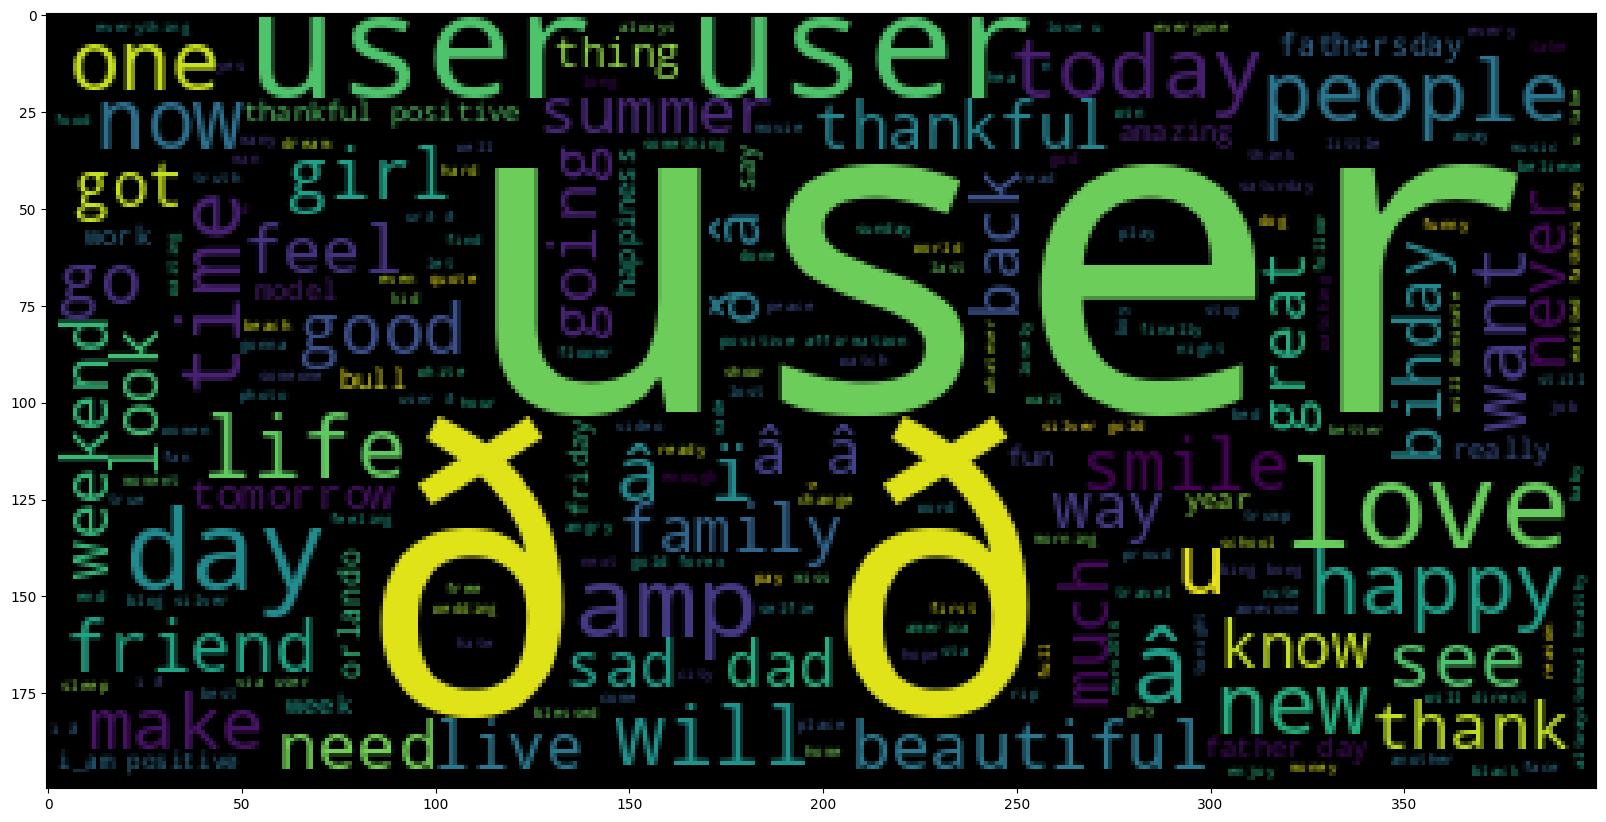

In [ ]:
#!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [ ]:
Test_punc_removed = [char for char in Test if char not in string.punctuation  ]

In [ ]:
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [ ]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [ ]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
Test_punc_removed_join_clean =[ word for word in Test_punc_removed_join.split() if word.lower() 
                               not in stopwords.words('english')]
                                                      

In [ ]:
Test_punc_removed_join_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

![image.png](attachment:image.png)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This paper is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [ ]:
print(vectorizer.get_feature_names_out())

['and' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [ ]:
print(X.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [ ]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [ ]:
tweets_df_clean.head()

29955    [went, club, tonight, bay, safe, say, fuck, mi...
24326    [live, alone, get, fever, midle, night, snuggl...
12303    [view, oregon, poland, usa, unitedstates, holi...
5236     [laaast, got, new, ð§music, best, company, a...
23392    [user, 3, days, left, go, chance, win, user, u...
Name: tweet, dtype: object

In [ ]:
print(tweets_df_clean[29955]) # show the cleaned up version

['went', 'club', 'tonight', 'bay', 'safe', 'say', 'fuck', 'miss', 'old', 'town', 'thotsdale', 'really']


In [ ]:
print(tweets_df['tweet'][29955]) # show the original version

went out to some club tonight out here in the bay. safe to say, fuck i miss old town thotsdale. i really do.  


In [ ]:
tweets_df_clean.head()

29955    [went, club, tonight, bay, safe, say, fuck, mi...
24326    [live, alone, get, fever, midle, night, snuggl...
12303    [view, oregon, poland, usa, unitedstates, holi...
5236     [laaast, got, new, ð§music, best, company, a...
23392    [user, 3, days, left, go, chance, win, user, u...
Name: tweet, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray()

In [ ]:
#print(vectorizer.get_feature_names())
tweets_countvectorizer.shape

(3000, 9256)

In [ ]:
tweets_countvectorizer.shape

(3000, 9256)

In [ ]:
tweets = pd.DataFrame(tweets_countvectorizer)


In [ ]:
tweets.head()

,0,1,2,3,4,5,6,7,8,9,...,9246,9247,9248,9249,9250,9251,9252,9253,9254,9255
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = tweets


In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,9246,9247,9248,9249,9250,9251,9252,9253,9254,9255
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = tweets_df['label']

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [ ]:
X.shape

(3000, 9256)

In [ ]:
y.shape

(3000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

![image.png](attachment:image.png)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

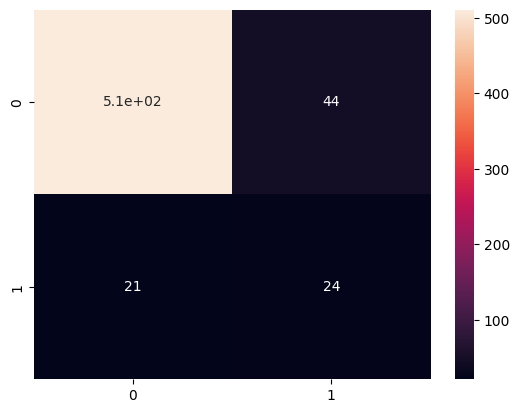

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
cm

array([[511,  44],
       [ 21,  24]])

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       555
           1       0.35      0.53      0.42        45

    accuracy                           0.89       600
   macro avg       0.66      0.73      0.68       600
weighted avg       0.91      0.89      0.90       600

